In [ ]:
import keras
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#setting parameters, gathering data and basic data preprocessing
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# pulling the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
#building a basic model with 2 conv layers followed by max pooling, then dropout and then fully connected with dropout culminating in softmax
basic_model = Sequential()
basic_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
basic_model.add(Conv2D(64, (3, 3), activation='relu'))
basic_model.add(MaxPooling2D(pool_size=(2, 2)))
basic_model.add(Dropout(0.25))
basic_model.add(Flatten())
basic_model.add(Dense(128, activation='relu'))
basic_model.add(Dropout(0.5))
basic_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#training and testing the basic model
basic_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adadelta",
              metrics=['accuracy'])

basic_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

train_score = basic_model.evaluate(x_train, y_train, verbose=0)
test_score = basic_model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Epoch 1/12
469/469 [==============================] - 204s 431ms/step - loss: 28.9882 - accuracy: 0.1406 - val_loss: 4.9874 - val_accuracy: 0.3751
Epoch 2/12
469/469 [==============================] - 206s 439ms/step - loss: 12.0204 - accuracy: 0.2489 - val_loss: 2.0269 - val_accuracy: 0.5218
Epoch 3/12
469/469 [==============================] - 198s 422ms/step - loss: 6.0070 - accuracy: 0.3140 - val_loss: 1.4080 - val_accuracy: 0.5313
Epoch 4/12
469/469 [==============================] - 200s 426ms/step - loss: 3.5549 - accuracy: 0.3223 - val_loss: 1.5128 - val_accuracy: 0.4748
Epoch 5/12
469/469 [==============================] - 199s 424ms/step - loss: 2.5858 - accuracy: 0.3189 - val_loss: 1.6184 - val_accuracy: 0.4416
Epoch 6/12
469/469 [==============================] - 199s 425ms/step - loss: 2.2443 - accuracy: 0.3219 - val_loss: 1.6413 - val_accuracy: 0.4351
Epoch 7/12
469/469 [==============================] - 196s 418ms/step - loss: 2.0663 - accuracy: 0.3388 - val_loss: 1.5923

In [ ]:
#training and testing the basic model
basic_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

basic_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

train_score = basic_model.evaluate(x_train, y_train, verbose=0)
test_score = basic_model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

In [ ]:
#building a slightly deeper model with 2 rounds of double convolution followed by pooling and dropout before fully connected network
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

Epoch 1/12
469/469 [==============================] - 191s 404ms/step - loss: 1.1168 - accuracy: 0.7231 - val_loss: 0.0867 - val_accuracy: 0.9734
Epoch 2/12
469/469 [==============================] - 188s 401ms/step - loss: 0.1803 - accuracy: 0.9463 - val_loss: 0.0502 - val_accuracy: 0.9841
Epoch 3/12
469/469 [==============================] - 185s 395ms/step - loss: 0.1206 - accuracy: 0.9641 - val_loss: 0.0358 - val_accuracy: 0.9899
Epoch 4/12
469/469 [==============================] - 185s 395ms/step - loss: 0.0999 - accuracy: 0.9711 - val_loss: 0.0352 - val_accuracy: 0.9883
Epoch 5/12
469/469 [==============================] - 181s 386ms/step - loss: 0.0869 - accuracy: 0.9741 - val_loss: 0.0252 - val_accuracy: 0.9917
Epoch 6/12
469/469 [==============================] - 183s 390ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0246 - val_accuracy: 0.9919
Epoch 7/12
469/469 [==============================] - 198s 422ms/step - loss: 0.0654 - accuracy: 0.9807 - val_loss: 0.0224 -

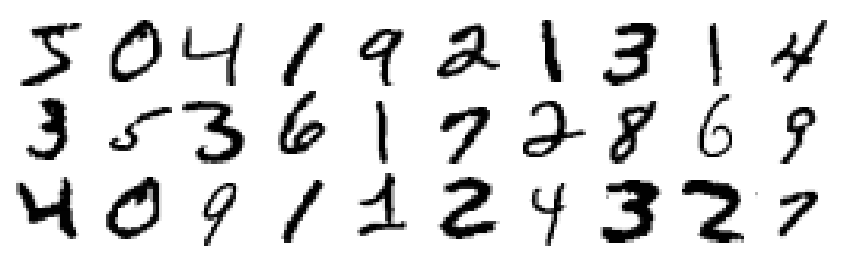

In [ ]:
#check the data
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(x_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
#Scale values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#Image Augmentation by rotation, scaling and translation
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)

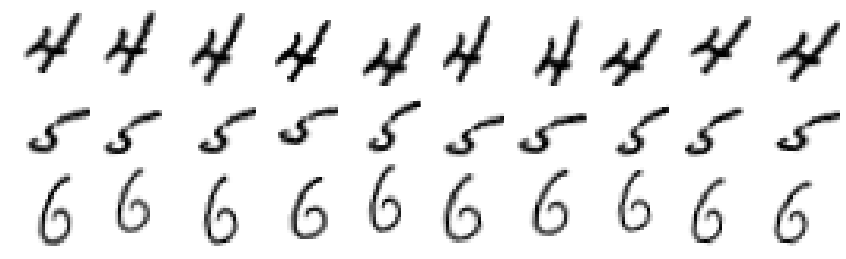

In [ ]:
#Checkout the new augmented images
x_train3 = x_train[9,].reshape((1,28,28,1))
y_train3 = y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    x_train2, y_train2 = datagen.flow(x_train3,y_train3).next()
    plt.imshow(x_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: x_train3 = x_train[11,].reshape((1,28,28,1))
    if i==19: x_train3 = x_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.35))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#Annealing the learning rate
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
#Train the model
epochs = 10
trained_model = model.fit_generator(datagen.flow(x_train,y_train, batch_size=64),
        epochs = epochs, steps_per_epoch = x_train.shape[0]//64,
        validation_data = (x_test,y_test), callbacks=[annealer], verbose=1)
print("CNN: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        epochs,max(trained_model.history['accuracy']),max(trained_model.history['val_accuracy']) ))

Epoch 1/10


<ipython-input-33-601c20792760>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  trained_model = model.fit_generator(datagen.flow(x_train,y_train, batch_size=64),


937/937 [==============================] - 274s 288ms/step - loss: 0.3056 - accuracy: 0.9066 - val_loss: 0.0377 - val_accuracy: 0.9868 - lr: 0.0010
Epoch 2/10
937/937 [==============================] - 272s 291ms/step - loss: 0.0973 - accuracy: 0.9703 - val_loss: 0.0876 - val_accuracy: 0.9751 - lr: 9.5000e-04
Epoch 3/10
937/937 [==============================] - 273s 292ms/step - loss: 0.0752 - accuracy: 0.9774 - val_loss: 0.0236 - val_accuracy: 0.9933 - lr: 9.0250e-04
Epoch 4/10
937/937 [==============================] - 270s 289ms/step - loss: 0.0627 - accuracy: 0.9806 - val_loss: 0.0174 - val_accuracy: 0.9944 - lr: 8.5737e-04
Epoch 5/10
937/937 [==============================] - 274s 293ms/step - loss: 0.0580 - accuracy: 0.9831 - val_loss: 0.0224 - val_accuracy: 0.9922 - lr: 8.1451e-04
Epoch 6/10
937/937 [==============================] - 276s 294ms/step - loss: 0.0517 - accuracy: 0.9843 - val_loss: 0.0177 - val_accuracy: 0.9941 - lr: 7.7378e-04
Epoch 7/10
937/937 [=================

KeyError: ignored

In [ ]:
trained_model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
print('Train loss:', max(trained_model.history['loss']))
print('Train accuracy:', max(trained_model.history['accuracy']))
print('Test loss:', max(trained_model.history['val_loss']))
print('Test accuracy:', max(trained_model.history['val_accuracy']))

Train loss: 0.30555951595306396
Train accuracy: 0.9884042739868164
Test loss: 0.08764498680830002
Test accuracy: 0.9954000115394592


In [ ]:
x1_train = x_train[0:40000]
y1_train = y_train[0:40000]
x2_train = x_train[40000:50000]
y2_train = y_train[40000:50000]
x3_train = x_train[50000:60000]
y3_train = y_train[50000:60000]
print(x1_train.shape)
print(x2_train.shape)
print(x3_train.shape)
print(y1_train.shape)
print(y2_train.shape)
print(y3_train.shape)

(40000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(40000, 10)
(10000, 10)
(10000, 10)


In [ ]:
x1_train = x_train[0:40000]
y1_train = y_train[0:40000]
x2_train = x_train[40000:50000]
y2_train = y_train[40000:50000]
x3_train = x_train[50000:60000]
y3_train = y_train[50000:60000]
print(x1_train.shape)
print(x2_train.shape)
print(x3_train.shape)
print(y1_train.shape)
print(y2_train.shape)
print(y3_train.shape)

(40000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(40000, 10)
(10000, 10)
(10000, 10)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x1_train, y1_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x2_train, y2_train, verbose=0)
score1 = model.evaluate(x1_train, y1_train, verbose=0)
score2 = model.evaluate(x3_train, y3_train, verbose=0)
score3 = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', score1[0])
print('Train accuracy:', score1[1])
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])
print('Train2 loss:', score[0])
print('Train2 accuracy:', score[1])
print('Train3 loss:', score2[0])
print('Train3 accuracy:', score2[1])

Epoch 1/12
313/313 [==============================] - 75s 237ms/step - loss: 37.3063 - accuracy: 0.1230 - val_loss: 8.1878 - val_accuracy: 0.3016
Epoch 2/12
313/313 [==============================] - 74s 236ms/step - loss: 20.8778 - accuracy: 0.1958 - val_loss: 3.3702 - val_accuracy: 0.5060
Epoch 3/12
313/313 [==============================] - 74s 236ms/step - loss: 12.5665 - accuracy: 0.2693 - val_loss: 1.8705 - val_accuracy: 0.6343
Epoch 4/12
313/313 [==============================] - 74s 237ms/step - loss: 8.0748 - accuracy: 0.3281 - val_loss: 1.3020 - val_accuracy: 0.6652
Epoch 5/12
313/313 [==============================] - 74s 236ms/step - loss: 5.5750 - accuracy: 0.3557 - val_loss: 1.1051 - val_accuracy: 0.6565
Epoch 6/12
313/313 [==============================] - 74s 235ms/step - loss: 4.0606 - accuracy: 0.3701 - val_loss: 1.1495 - val_accuracy: 0.6293
Epoch 7/12
313/313 [==============================] - 74s 237ms/step - loss: 3.1204 - accuracy: 0.3731 - val_loss: 1.3086 - val

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x1_train, y1_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x2_train, y2_train, verbose=0)
score1 = model.evaluate(x1_train, y1_train, verbose=0)
score2 = model.evaluate(x3_train, y3_train, verbose=0)
score3 = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', score1[0])
print('Train accuracy:', score1[1])
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])
print('Train2 loss:', score[0])
print('Train2 accuracy:', score[1])
print('Train3 loss:', score2[0])
print('Train3 accuracy:', score2[1])

Epoch 1/12
313/313 [==============================] - 29s 89ms/step - loss: 29.9448 - accuracy: 0.0944 - val_loss: 8.3055 - val_accuracy: 0.0546
Epoch 2/12
313/313 [==============================] - 26s 85ms/step - loss: 23.0185 - accuracy: 0.0990 - val_loss: 5.8404 - val_accuracy: 0.0664
Epoch 3/12
313/313 [==============================] - 26s 84ms/step - loss: 18.2080 - accuracy: 0.0975 - val_loss: 4.2939 - val_accuracy: 0.0869
Epoch 4/12
313/313 [==============================] - 27s 87ms/step - loss: 14.3791 - accuracy: 0.1050 - val_loss: 3.2806 - val_accuracy: 0.1297
Epoch 5/12
313/313 [==============================] - 26s 84ms/step - loss: 11.5683 - accuracy: 0.1059 - val_loss: 2.7231 - val_accuracy: 0.1834
Epoch 6/12
313/313 [==============================] - 26s 84ms/step - loss: 9.5661 - accuracy: 0.1097 - val_loss: 2.4278 - val_accuracy: 0.2264
Epoch 7/12
313/313 [==============================] - 26s 84ms/step - loss: 8.0252 - accuracy: 0.1167 - val_loss: 2.2780 - val_accu

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x1_train, y1_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x2_train, y2_train, verbose=0)
score1 = model.evaluate(x1_train, y1_train, verbose=0)
score2 = model.evaluate(x3_train, y3_train, verbose=0)
score3 = model.evaluate(x_test, y_test, verbose=0)
print('Train loss:', score1[0])
print('Train accuracy:', score1[1])
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])
print('Train2 loss:', score[0])
print('Train2 accuracy:', score[1])
print('Train3 loss:', score2[0])
print('Train3 accuracy:', score2[1])

Epoch 1/12
313/313 [==============================] - 102s 326ms/step - loss: 37.2821 - accuracy: 0.1018 - val_loss: 5.6161 - val_accuracy: 0.1266
Epoch 2/12
313/313 [==============================] - 104s 331ms/step - loss: 22.7151 - accuracy: 0.1169 - val_loss: 3.6183 - val_accuracy: 0.2921
Epoch 3/12
313/313 [==============================] - 103s 328ms/step - loss: 15.7743 - accuracy: 0.1341 - val_loss: 2.6621 - val_accuracy: 0.3413
Epoch 4/12
313/313 [==============================] - 104s 331ms/step - loss: 11.5727 - accuracy: 0.1507 - val_loss: 2.0439 - val_accuracy: 0.3922
Epoch 5/12
313/313 [==============================] - 102s 328ms/step - loss: 9.0154 - accuracy: 0.1585 - val_loss: 1.7409 - val_accuracy: 0.4335
Epoch 6/12
313/313 [==============================] - 108s 344ms/step - loss: 7.1533 - accuracy: 0.1675 - val_loss: 1.6331 - val_accuracy: 0.4566
Epoch 7/12
313/313 [==============================] - 104s 333ms/step - loss: 5.7876 - accuracy: 0.1785 - val_loss: 1.63